# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [1]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\GitHub_Repositories\scientific_programming\Week_08\challenge


## Functions to get the content of RSS-Feeds

In [2]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [3]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,«Aus Versehen» ausgeschafft: Kilmar Garcia flo...,"Sat, 12 Apr 2025 03:30:00 GMT",ld.1879980,Kilmar Garcia floh vor brutalen Gangs in El Sa...
1,«Man spricht gern über eine Brandmauer. Aber d...,"Sat, 12 Apr 2025 03:30:00 GMT",ld.1879683,Der ÖVP-Chef Stocker führt Österreichs erste D...
2,Krieg oder Kompromiss im Atomstreit? Die Erzfe...,"Sat, 12 Apr 2025 06:48:27 GMT",ld.1879931,Präsident Trump hat der Islamischen Republik e...
3,Trumps Politik beschädigt das Vertrauen in die...,"Sat, 12 Apr 2025 04:39:14 GMT",ld.1879211,Trump hat den Chef des grössten Geheimdienstes...
4,Ukraine-Partner versprechen weitere Milliarden...,"Fri, 11 Apr 2025 15:32:18 GMT",ld.1879972,Im Februar schockierte der amerikanische Verte...
5,DATENANALYSE - Trump baut die USA um – kommt n...,"Sat, 12 Apr 2025 03:30:00 GMT",ld.1878314,Die Proteste gegen die Eingriffe der amerikani...
6,Big Brother in London: Wie künstliche Intellig...,"Sat, 12 Apr 2025 03:30:00 GMT",ld.1879626,"In Grossbritannien boomen smarte Kameras, die ..."
7,Panama stimmt einer vermehrten Präsenz amerika...,"Fri, 11 Apr 2025 14:50:00 GMT",ld.1879891,Beim Besuch des amerikanischen Verteidigungsmi...
8,Von wegen Traumdestination: Viele Neuseeländer...,"Fri, 11 Apr 2025 14:55:00 GMT",ld.1875097,Touristen aus Europa verklären Neuseeland als ...
9,An der Basis der CDU rumort es: «Friedrich Mer...,"Sat, 12 Apr 2025 03:30:00 GMT",ld.1879781,Im mecklenburgischen Ostseebad Kühlungsborn tr...


## Getting infos from multiple RSS-Feeds

In [4]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(100)

,title,pubDate,guid,description
0,China: Warnung vor starken Winden – Menschen u...,"Sat, 12 Apr 2025 12:40:00 +0200",https://www.spiegel.de/panorama/gesellschaft/c...,"Flüge gestrichen, historische Stätten geschlos..."
1,Handelskrieg: Taiwan beginnt Zoll-Verhandlunge...,"Sat, 12 Apr 2025 12:36:00 +0200",https://www.spiegel.de/wirtschaft/handelskrieg...,Im Gegensatz zu vielen anderen Ländern wollte ...
2,Sarah Connor verarbeitet Ärger über »Ficka« au...,"Sat, 12 Apr 2025 12:29:00 +0200",https://www.spiegel.de/panorama/leute/sarah-co...,"»Die Titten sind nicht echt, und ihr Style is’..."
3,Indien und Nepal: Dutzende Tote nach heftigen ...,"Sat, 12 Apr 2025 12:16:00 +0200",https://www.spiegel.de/ausland/indien-und-nepa...,In Ostindien und Nepal ist es in diesem Jahr u...
4,Tägliches Quiz beim SPIEGEL: 7 Fragen zum Allg...,"Sat, 12 Apr 2025 12:15:00 +0200",https://www.spiegel.de/games/taegliches-quiz-b...,Jeden Tag gibt es sieben Fragen zu den wichtig...
...,...,...,...,...
95,Prince Harry Meets War Victims in Surprise Vis...,"Fri, 11 Apr 2025 17:34:28 +0000",https://www.nytimes.com/2025/04/11/world/europ...,The prince toured a rehabilitation facility in...
96,Siemens Executive and His Family Died in Hudso...,"Sat, 12 Apr 2025 07:23:36 +0000",https://www.nytimes.com/2025/04/11/world/europ...,"Agustín Escobar and Mercè Camprubí Montal, bot..."
97,"Trump Envoy Steve Witkoff Is in Russia, the Kr...","Fri, 11 Apr 2025 15:29:27 +0000",https://www.nytimes.com/2025/04/11/world/europ...,"Separately in Belgium, nations supporting Ukra..."
98,Marine Le Pen’s ‘Witch Hunt’ Talk Echoes Trump...,"Fri, 11 Apr 2025 10:30:31 +0000",https://www.nytimes.com/2025/04/11/world/europ...,After years trying to moderate her party’s ima...


## Finding the k most frequent words per RSS-Feed title

In [5]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('China:', 1), ('Warnung', 1), ('vor', 1), ('starken', 1), ('Winden', 1)]
[('Handelskrieg:', 1), ('Taiwan', 1), ('beginnt', 1), ('Zoll-Verhandlungen', 1), ('mit', 1)]
[('Sarah', 1), ('Connor', 1), ('verarbeitet', 1), ('Ärger', 1), ('über', 1)]
[('Indien', 1), ('und', 1), ('Nepal:', 1), ('Dutzende', 1), ('Tote', 1)]
[('Tägliches', 1), ('Quiz', 1), ('beim', 1), ('SPIEGEL:', 1), ('7', 1)]
[('Bernhard', 1), ('Langer:', 1), ('Emotionaler', 1), ('Abschied', 1), ('bei', 1)]
[('Collegium', 1), ('Academicum', 1), ('Heidelberg:', 1), ('Diese', 1), ('Studierenden', 1)]
[('Capybara', 1), ('Café', 1), ('in', 1), ('St.', 1), ('Augustine,', 1)]
[('Berlin:', 1), ('Abriss', 1), ('von', 1), ('maroder', 1), ('Autobahnbrücke', 1)]
[('Lopifit', 1), ('im', 1), ('Test:', 1), ('Ein', 1), ('Laufband', 1)]
[('Familie:', 1), ('Diskussionen', 1), ('mit', 1), ('den', 1), ('Kindern', 1)]
[('Koalitionsvertrag:', 1), ('Das', 1), ('bringt', 1), ('das', 1), ('Regierungsprogramm', 1)]
[('Menendez-Brüder:', 1), ('Strafm

## Create a wordcloud with the most frequent words in RSS-Feed titles

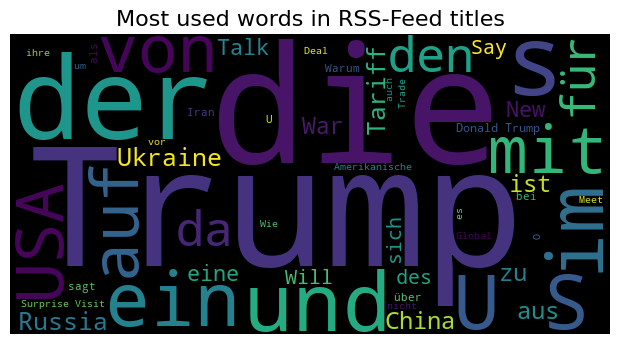

In [6]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2025-04-12 12:57:23
Python Version: 3.11.10
-----------------------------------
